In [129]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as pyplt 

----------------------------

In [44]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [48]:
!wget $data -O 'telco_churn.csv'

--2022-09-22 03:20:43--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977501 (955K) [text/plain]
Saving to: ‘telco_churn.csv’

telco_churn.csv     100%[===================>] 954.59K  2.76MB/s    in 0.3s    

2022-09-22 03:20:44 (2.76 MB/s) - ‘telco_churn.csv’ saved [977501/977501]



In [661]:
df = pd.read_csv('telco_churn.csv')

In [662]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [663]:
df.columns = df.columns.str.title().str.replace(' ','_')

In [664]:
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

In [665]:
for i in categorical_columns:
    df[i] = df[i].str.lower().str.replace(' ', '_')

In [666]:
df.head()

,Customerid,Gender,Seniorcitizen,Partner,Dependents,Tenure,Phoneservice,Multiplelines,Internetservice,Onlinesecurity,...,Deviceprotection,Techsupport,Streamingtv,Streamingmovies,Contract,Paperlessbilling,Paymentmethod,Monthlycharges,Totalcharges,Churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.5,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes


In [667]:
df.dtypes

Customerid           object
Gender               object
Seniorcitizen         int64
Partner              object
Dependents           object
Tenure                int64
Phoneservice         object
Multiplelines        object
Internetservice      object
Onlinesecurity       object
Onlinebackup         object
Deviceprotection     object
Techsupport          object
Streamingtv          object
Streamingmovies      object
Contract             object
Paperlessbilling     object
Paymentmethod        object
Monthlycharges      float64
Totalcharges         object
Churn                object
dtype: object

In [668]:
df.Totalcharges = pd.to_numeric((df.Totalcharges), errors='coerce')

In [669]:
df.Totalcharges = df.Totalcharges.fillna(0)

In [670]:
df.Totalcharges.isnull().sum()

0

In [671]:
df.Churn = (df.Churn == 'yes').astype(int)

In [672]:
df.Churn

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [673]:
df.head().T

,0,1,2,3,4
Customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
Gender,female,male,male,male,female
Seniorcitizen,0,0,0,0,0
Partner,yes,no,no,no,no
Dependents,no,no,no,no,no
Tenure,1,34,2,45,2
Phoneservice,no,yes,yes,no,yes
Multiplelines,no_phone_service,no,no,no_phone_service,no
Internetservice,dsl,dsl,dsl,dsl,fiber_optic
Onlinesecurity,no,yes,yes,yes,no


In [674]:
from sklearn.model_selection import train_test_split ##

In [675]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1) ##

In [676]:
len(df_full_train), len(df_test)

(5634, 1409)

In [677]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [678]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [679]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [680]:
y_train = df_train.Churn.values
y_val = df_val.Churn.values
y_test = df_test.Churn.values

In [681]:
del df_train['Churn']
del df_val['Churn']
del df_test['Churn']

In [682]:
df_full_train

,Customerid,Gender,Seniorcitizen,Partner,Dependents,Tenure,Phoneservice,Multiplelines,Internetservice,Onlinesecurity,...,Deviceprotection,Techsupport,Streamingtv,Streamingmovies,Contract,Paperlessbilling,Paymentmethod,Monthlycharges,Totalcharges,Churn
1814,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
5946,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
3881,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
2389,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
3676,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,0781-lkxbr,male,1,no,no,9,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,100.50,918.60,1
5192,3507-gasnp,male,0,no,yes,60,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.95,1189.90,0
3980,8868-wozgu,male,0,no,no,28,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,105.70,2979.50,1
235,1251-krreg,male,0,no,no,2,yes,yes,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,54.40,114.10,1


In [683]:
df_full_train.Churn.value_counts(normalize=True) #returns churn rate

0    0.730032
1    0.269968
Name: Churn, dtype: float64

In [684]:
global_churn = df_full_train.Churn.mean()
round(global_churn, 2)

0.27

In [685]:
numerical = ['Tenure', 'Monthlycharges', 'Totalcharges']

In [686]:
df_full_train.columns

Index(['Customerid', 'Gender', 'Seniorcitizen', 'Partner', 'Dependents',
       'Tenure', 'Phoneservice', 'Multiplelines', 'Internetservice',
       'Onlinesecurity', 'Onlinebackup', 'Deviceprotection', 'Techsupport',
       'Streamingtv', 'Streamingmovies', 'Contract', 'Paperlessbilling',
       'Paymentmethod', 'Monthlycharges', 'Totalcharges', 'Churn'],
      dtype='object')

In [687]:
categorical = ['Gender', 'Seniorcitizen', 'Partner', 'Dependents',
       'Phoneservice', 'Multiplelines', 'Internetservice',
       'Onlinesecurity', 'Onlinebackup', 'Deviceprotection', 'Techsupport',
       'Streamingtv', 'Streamingmovies', 'Contract', 'Paperlessbilling',
       'Paymentmethod']

In [688]:
df_full_train[categorical].nunique()

Gender              2
Seniorcitizen       2
Partner             2
Dependents          2
Phoneservice        2
Multiplelines       3
Internetservice     3
Onlinesecurity      3
Onlinebackup        3
Deviceprotection    3
Techsupport         3
Streamingtv         3
Streamingmovies     3
Contract            3
Paperlessbilling    2
Paymentmethod       4
dtype: int64

In [689]:
churn_female = df_full_train[df_full_train.Gender == 'female'].Churn.mean()

In [690]:
churn_male = df_full_train[df_full_train.Gender == 'male'].Churn.mean()

In [691]:
churn_female, churn_male, global_churn

(0.27682403433476394, 0.2632135306553911, 0.26996805111821087)

In [692]:
df_full_train.Partner.value_counts()

no     2932
yes    2702
Name: Partner, dtype: int64

In [693]:
churn_partner = df_full_train[df_full_train.Partner == 'yes'].Churn.mean()

In [694]:
churn_no_partner = df_full_train[df_full_train.Partner == 'no'].Churn.mean()

In [695]:
churn_partner, churn_no_partner

(0.20503330866025166, 0.3298090040927694)

In [696]:
global_churn - churn_no_partner

-0.05984095297455855

In [697]:
global_churn - churn_partner

0.06493474245795922

In [698]:
global_churn - churn_female 

-0.006855983216553063

In [699]:
global_churn - churn_male 

0.006754520462819769

In [700]:
churn_no_partner / global_churn

1.2216593879412643

In [701]:
churn_partner / global_churn

0.7594724924338315

In [702]:
churn_male / global_churn

0.9749802969838747

# Feature Importance

1. Difference = global churn - group

d < 0 = more likely to churn

d > 0 = less likely to churn

2. Risk Ratio = Group / Global 

 r > 1 more likely to churn

r < 1 less likely to churn

---------------------------

SQL code for getting churn rate, diff, mean for every column

SELECT
    gender,
    AVG(Churn),
    AVG(Churn) - global_churn AS diff,
    AVG(Churn) / global_churn AS risk 
FROM
    data
GROUP BY
    Gender;

---------------

In [703]:
from IPython.display import display

In [704]:
for c in categorical:
    df_group = df_full_train.groupby(c).Churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn
    df_group['risk'] = df_group['mean'] / global_churn
    display(df_group)
    print()
    print()

,mean,count,diff,risk
Gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


,mean,count,diff,risk
Seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208


,mean,count,diff,risk
Partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472


,mean,count,diff,risk
Dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651


,mean,count,diff,risk
Phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412


,mean,count,diff,risk
Multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948


,mean,count,diff,risk
Internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201


,mean,count,diff,risk
Onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570


,mean,count,diff,risk
Onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660


,mean,count,diff,risk
Deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480


,mean,count,diff,risk
Techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390


,mean,count,diff,risk
Streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328


,mean,count,diff,risk
Streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182


,mean,count,diff,risk
Contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730


,mean,count,diff,risk
Paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560


,mean,count,diff,risk
Paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


In [705]:
df_group

,mean,count,diff,risk
Paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


In [706]:
from sklearn.metrics import mutual_info_score

In [707]:
mutual_info_score(df_full_train.Contract, df_full_train.Churn)

0.0983203874041556

In [708]:
mutual_info_score(df_full_train.Gender, df_full_train.Churn)

0.0001174846211139946

In [709]:
mutual_info_score(df_full_train.Paymentmethod, df_full_train.Churn)

0.043210027531582915

In [710]:
mutual_info_score(df_full_train.Partner, df_full_train.Churn)

0.009967689095399745

In [711]:
def mutual_info_churn(series):
    return mutual_info_score(series, df_full_train.Churn)

In [712]:
MI = df_full_train[categorical].apply(mutual_info_churn)

In [713]:
MI.sort_values(ascending=False)

Contract            0.098320
Onlinesecurity      0.063085
Techsupport         0.061032
Internetservice     0.055868
Onlinebackup        0.046923
Deviceprotection    0.043453
Paymentmethod       0.043210
Streamingtv         0.031853
Streamingmovies     0.031581
Paperlessbilling    0.017589
Dependents          0.012346
Partner             0.009968
Seniorcitizen       0.009410
Multiplelines       0.000857
Phoneservice        0.000229
Gender              0.000117
dtype: float64

In [714]:
df_full_train[numerical].corrwith(df_full_train.Churn).abs()

Tenure            0.351885
Monthlycharges    0.196805
Totalcharges      0.196353
dtype: float64

In [715]:
df_full_train[df_full_train.Tenure <= 2].Churn.mean()

0.5953420669577875

In [716]:
df_full_train[(df_full_train.Tenure > 2) & (df_full_train.Tenure <= 12)].Churn.mean()

0.3994413407821229

In [717]:
df_full_train[df_full_train.Tenure > 12].Churn.mean()

0.17634908339788277

In [718]:
from sklearn.feature_extraction import DictVectorizer

In [719]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')

In [720]:
df_train[categorical + numerical].isnull().sum()

Gender              0
Seniorcitizen       0
Partner             0
Dependents          0
Phoneservice        0
Multiplelines       0
Internetservice     0
Onlinesecurity      0
Onlinebackup        0
Deviceprotection    0
Techsupport         0
Streamingtv         0
Streamingmovies     0
Contract            0
Paperlessbilling    0
Paymentmethod       0
Tenure              0
Monthlycharges      0
Totalcharges        0
dtype: int64

In [721]:
dv = DictVectorizer(sparse=False)

In [722]:
x_train = dv.fit_transform(train_dicts)

In [723]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')

In [724]:
x_val = dv.transform(val_dicts)

In [725]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [726]:
z = np.linspace(-5, 5, 51)

In [727]:
sigmoid(z)

array([0.00669285, 0.00816257, 0.0099518 , 0.01212843, 0.01477403,
       0.01798621, 0.02188127, 0.02659699, 0.03229546, 0.03916572,
       0.04742587, 0.05732418, 0.06913842, 0.0831727 , 0.09975049,
       0.11920292, 0.14185106, 0.16798161, 0.19781611, 0.23147522,
       0.26894142, 0.31002552, 0.35434369, 0.40131234, 0.450166  ,
       0.5       , 0.549834  , 0.59868766, 0.64565631, 0.68997448,
       0.73105858, 0.76852478, 0.80218389, 0.83201839, 0.85814894,
       0.88079708, 0.90024951, 0.9168273 , 0.93086158, 0.94267582,
       0.95257413, 0.96083428, 0.96770454, 0.97340301, 0.97811873,
       0.98201379, 0.98522597, 0.98787157, 0.9900482 , 0.99183743,
       0.99330715])

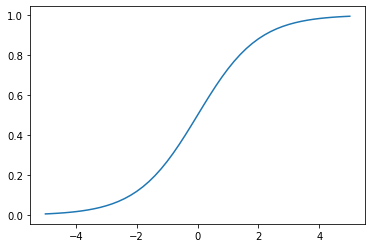

In [728]:
pyplt.plot(z, sigmoid(z))

In [729]:
def linear_regression(xi):
    result = w0
    
    for j in range(len(w)):
        result = result + xi[j] * w[j]
        
    return result

In [730]:
def logistic_regression(xi):
    result = w0
    
    for j in range(len(w)):
        result = result + xi[j] * w[j]
    
    result = sigmoid(result)
    return result

In [731]:
from sklearn.linear_model import LogisticRegression

In [732]:
model = LogisticRegression()

In [733]:
model.fit(x_train, y_train)

LogisticRegression()

In [800]:
model.intercept_[0] #biased term

-0.10903366219583091

In [805]:
model.coef_[0].round(3) #churn rates for every column

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.316, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.07 , -0.059,  0.141,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

In [745]:
y_pred = model.predict_proba(x_val)[:,1]

In [750]:
churn_decision = (y_pred >= 0.5) #displays who is gonna churn (True) and who won't (False)

In [751]:
df_val[churn_decision] #selects all the rows where customer will churn (True)

,Customerid,Gender,Seniorcitizen,Partner,Dependents,Tenure,Phoneservice,Multiplelines,Internetservice,Onlinesecurity,Onlinebackup,Deviceprotection,Techsupport,Streamingtv,Streamingmovies,Contract,Paperlessbilling,Paymentmethod,Monthlycharges,Totalcharges
3,8433-wxgna,male,0,no,no,2,yes,no,fiber_optic,yes,no,no,no,no,no,month-to-month,yes,electronic_check,75.70,189.20
8,3440-jpscl,female,0,no,no,6,yes,no,fiber_optic,no,no,yes,yes,yes,yes,month-to-month,yes,mailed_check,99.95,547.65
11,2637-fkfsy,female,0,yes,no,3,yes,no,dsl,no,no,no,no,no,no,month-to-month,yes,mailed_check,46.10,130.15
12,7228-omtpn,male,0,no,no,4,yes,no,fiber_optic,no,no,no,no,yes,yes,month-to-month,yes,electronic_check,88.45,370.65
19,6711-fldfb,female,0,no,no,7,yes,yes,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,74.90,541.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1397,5976-jcjrh,male,0,yes,no,10,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,70.30,738.20
1398,2034-cgrhz,male,1,no,no,24,yes,yes,fiber_optic,no,yes,yes,no,yes,yes,month-to-month,yes,credit_card_(automatic),102.95,2496.70
1399,5276-kqwhg,female,1,no,no,2,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,69.60,131.65
1407,6521-yytyi,male,0,no,yes,1,yes,yes,fiber_optic,no,no,no,no,yes,yes,month-to-month,yes,electronic_check,93.30,93.30


In [835]:
(y_val == churn_decision).mean() #how much our model is accurate

0.8034066713981547

In [757]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val

In [796]:
df_pred['correct'] = df_pred.prediction == df_pred.actual
df_pred['incorrect'] = df_pred.prediction != df_pred.actual
df_pred.correct[df_pred.correct == True].sum(), df_pred.incorrect[df_pred.incorrect == True].sum()

(1132, 277)

In [798]:
df_pred.correct.mean(), df_pred.incorrect.mean()

(0.8034066713981547, 0.19659332860184528)

In [804]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'Contract=month-to-month': 0.475,
 'Contract=one_year': -0.175,
 'Contract=two_year': -0.408,
 'Dependents=no': -0.03,
 'Dependents=yes': -0.078,
 'Deviceprotection=no': 0.063,
 'Deviceprotection=no_internet_service': -0.089,
 'Deviceprotection=yes': -0.081,
 'Gender=female': -0.034,
 'Gender=male': -0.073,
 'Internetservice=dsl': -0.335,
 'Internetservice=fiber_optic': 0.316,
 'Internetservice=no': -0.089,
 'Monthlycharges': 0.004,
 'Multiplelines=no': -0.258,
 'Multiplelines=no_phone_service': 0.141,
 'Multiplelines=yes': 0.009,
 'Onlinebackup=no': 0.063,
 'Onlinebackup=no_internet_service': -0.089,
 'Onlinebackup=yes': -0.081,
 'Onlinesecurity=no': 0.266,
 'Onlinesecurity=no_internet_service': -0.089,
 'Onlinesecurity=yes': -0.284,
 'Paperlessbilling=no': -0.231,
 'Paperlessbilling=yes': 0.124,
 'Partner=no': -0.166,
 'Partner=yes': 0.058,
 'Paymentmethod=bank_transfer_(automatic)': -0.087,
 'Paymentmethod=credit_card_(automatic)': -0.032,
 'Paymentmethod=electronic_check': 0.07,
 

In [806]:
small = ['Contract', 'Tenure', 'Monthlycharges']

In [808]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [809]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [811]:
dv_small.get_feature_names_out()

array(['Contract=month-to-month', 'Contract=one_year',
       'Contract=two_year', 'Monthlycharges', 'Tenure'], dtype=object)

In [813]:
x_train_small = dv_small.transform(dicts_train_small)
x_val_small = dv_small.transform(dicts_val_small)

In [815]:
model_small = LogisticRegression()
model_small.fit(x_train_small, y_train)

LogisticRegression()

In [822]:
w0 = model_small.intercept_[0]
w0

-2.476775659173247

In [820]:
w = model_small.coef_[0]
w.round(3)

array([ 0.97 , -0.025, -0.949,  0.027, -0.036])

In [821]:
dict(zip(dv_small.get_feature_names_out(), w.round(3)))

{'Contract=month-to-month': 0.97,
 'Contract=one_year': -0.025,
 'Contract=two_year': -0.949,
 'Monthlycharges': 0.027,
 'Tenure': -0.036}

In [833]:
-2.47 + -0.949 + 30 * 0.027 + 24 * (-0.036)

-3.473

In [834]:
sigmoid(_)

0.030090303318277657

----------------------------

In [836]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')

In [837]:
dv = DictVectorizer(sparse=False)
x_full_train = dv.fit_transform(dicts_full_train)

In [840]:
y_full_train = df_full_train.Churn.values

In [843]:
model = LogisticRegression()
model.fit(x_full_train, y_full_train)

LogisticRegression()

In [845]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')

In [846]:
x_test = dv.transform(dicts_test)

In [847]:
y_pred = model.predict_proba(x_test)[:,1]

In [848]:
churn_decision = (y_pred >= 0.5)

In [849]:
(churn_decision == y_test).mean()

0.815471965933286

In [852]:
customer = dicts_test[10]
customer

{'Gender': 'male',
 'Seniorcitizen': 1,
 'Partner': 'yes',
 'Dependents': 'yes',
 'Phoneservice': 'yes',
 'Multiplelines': 'no',
 'Internetservice': 'fiber_optic',
 'Onlinesecurity': 'no',
 'Onlinebackup': 'yes',
 'Deviceprotection': 'no',
 'Techsupport': 'no',
 'Streamingtv': 'yes',
 'Streamingmovies': 'yes',
 'Contract': 'month-to-month',
 'Paperlessbilling': 'yes',
 'Paymentmethod': 'mailed_check',
 'Tenure': 32,
 'Monthlycharges': 93.95,
 'Totalcharges': 2861.45}

In [858]:
x_small = dv.transform(customer)

In [862]:
x_small_pred = model.predict_proba(x_small)[0,1]

In [881]:
y_test[10]

0

In [877]:
customer = dicts_test[-1]
customer

{'Gender': 'female',
 'Seniorcitizen': 0,
 'Partner': 'yes',
 'Dependents': 'yes',
 'Phoneservice': 'yes',
 'Multiplelines': 'yes',
 'Internetservice': 'fiber_optic',
 'Onlinesecurity': 'yes',
 'Onlinebackup': 'no',
 'Deviceprotection': 'yes',
 'Techsupport': 'no',
 'Streamingtv': 'yes',
 'Streamingmovies': 'yes',
 'Contract': 'month-to-month',
 'Paperlessbilling': 'yes',
 'Paymentmethod': 'electronic_check',
 'Tenure': 17,
 'Monthlycharges': 104.2,
 'Totalcharges': 1743.5}

In [878]:
x_small = dv.transform(customer)

In [879]:
x_small_pred = model.predict_proba(x_small)[0,1]

In [880]:
x_small_pred

0.5968852088173856

In [882]:
y_test[-1]

1